In [1]:
import pandas as pd, numpy as np
import sklearn
import scipy.sparse
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup
import re
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
train_data = pd.read_csv('../data/raw_data/train.csv')
test_data = pd.read_csv('../data/raw_data/test.csv')

train_labels=(train_data["Labels"])
test_labels = test_data["Labels"]

corpus_train = train_data["Comment"]
corpus_test = test_data["Comment"]

In [3]:
test_data.shape

(63978, 2)

In [3]:
# vectorizer = CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english',ngram_range=(1, i))
# train_feature_vectors_sparse = vectorizer.fit_transform(corpus_train)
# test_feature_vectors_sparse = vectorizer.fit_transform(corpus_test)

In [8]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('cv', CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english')),
    ('clf', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False))
])


In [10]:
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV
# tfidf_transformer = TfidfTransformer()
parameters = {'cv__ngram_range':((1, 1),(2, 2),(3, 3),(1, 2),(1, 3))}
grid = GridSearchCV(pipeline, parameters, scoring = make_scorer(f1_score), cv=5, error_score=0.0, verbose=10)


In [11]:
grid.fit(corpus_train, train_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] cv__ngram_range=(1, 1) ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . cv__ngram_range=(1, 1), score=0.7656585925182743, total=  56.8s
[CV] cv__ngram_range=(1, 1) ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] . cv__ngram_range=(1, 1), score=0.7629661380197171, total=  49.5s
[CV] cv__ngram_range=(1, 1) ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[CV] . cv__ngram_range=(1, 1), score=0.7623461259956553, total=  55.9s
[CV] cv__ngram_range=(1, 1) ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min remaining:    0.0s


[CV] .. cv__ngram_range=(1, 1), score=0.770166545981173, total=  55.0s
[CV] cv__ngram_range=(1, 1) ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.0min remaining:    0.0s


[CV] . cv__ngram_range=(1, 1), score=0.7642205818497613, total=  58.2s
[CV] cv__ngram_range=(2, 2) ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.1min remaining:    0.0s


[CV] . cv__ngram_range=(2, 2), score=0.5027567898713498, total= 3.9min
[CV] cv__ngram_range=(2, 2) ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.1min remaining:    0.0s


[CV] . cv__ngram_range=(2, 2), score=0.5232204421009937, total= 5.7min
[CV] cv__ngram_range=(2, 2) ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 15.0min remaining:    0.0s


[CV] . cv__ngram_range=(2, 2), score=0.5093167701863354, total= 4.3min
[CV] cv__ngram_range=(2, 2) ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 19.4min remaining:    0.0s


[CV]  cv__ngram_range=(2, 2), score=0.49938296997120524, total= 4.4min
[CV] cv__ngram_range=(2, 2) ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 24.0min remaining:    0.0s


[CV]  cv__ngram_range=(2, 2), score=0.49526163988463123, total= 3.8min
[CV] cv__ngram_range=(3, 3) ..........................................
[CV]  cv__ngram_range=(3, 3), score=0.18406889128094725, total= 5.4min
[CV] cv__ngram_range=(3, 3) ..........................................
[CV]  cv__ngram_range=(3, 3), score=0.18567212235041589, total= 4.4min
[CV] cv__ngram_range=(3, 3) ..........................................
[CV]  cv__ngram_range=(3, 3), score=0.18196588139723804, total= 5.0min
[CV] cv__ngram_range=(3, 3) ..........................................
[CV]  cv__ngram_range=(3, 3), score=0.16883821932681867, total= 6.4min
[CV] cv__ngram_range=(3, 3) ..........................................
[CV]  cv__ngram_range=(3, 3), score=0.16712030484485577, total= 4.0min
[CV] cv__ngram_range=(1, 2) ..........................................
[CV] . cv__ngram_range=(1, 2), score=0.7860712054965646, total= 9.5min
[CV] cv__ngram_range=(1, 2) ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 203.2min finished


GridSearchCV(cv=5, error_score=0.0,
       estimator=Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        st...ty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'cv__ngram_range': ((1, 1), (2, 2), (3, 3), (1, 2), (1, 3))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=10)

In [13]:
grid.best_score_

0.78940810164419273

In [14]:
a = pd.DataFrame.from_dict(grid.cv_results_)
a

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0      53.555645         1.509771         0.765072          0.919044   
1     263.791873         2.381530         0.505988          0.990102   
2     300.727387         2.255641         0.177533          0.977348   
3     550.221610         2.844876         0.789408          0.989527   
4    1206.425275         4.077643         0.787527          0.994668   

  param_cv__ngram_range                       params  rank_test_score  \
0                (1, 1)  {'cv__ngram_range': (1, 1)}                3   
1                (2, 2)  {'cv__ngram_range': (2, 2)}                4   
2                (3, 3)  {'cv__ngram_range': (3, 3)}                5   
3                (1, 2)  {'cv__ngram_range': (1, 2)}                1   
4                (1, 3)  {'cv__ngram_range': (1, 3)}                2   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.765659            0.919479           0.762966       ...          
1           0.502757            0.990407           0.523220       ...          
2           0.184069            0.976469           0.185672       ...          
3           0.786071            0.989240           0.791576       ...          
4           0.783944            0.994553           0.790453       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.762346            0.919297           0.770167   
1           0.509317            0.989439           0.499383   
2           0.181966            0.977214           0.168838   
3           0.784630            0.989695           0.789266   
4           0.782524            0.994782           0.790533   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.919334           0.764221            0.918205      2.973291   
1            0.990126           0.495262            0.990059     40.731821   
2            0.978284           0.167120            0.977707     49.739946   
3            0.989767           0.795498            0.989428     72.772533   
4            0.994743           0.790179            0.994858    167.691715   

   std_score_time  std_test_score  std_train_score  
0        0.016745        0.002789         0.000461  
1        0.180887        0.009769         0.000368  
2        0.120267        0.007907         0.000612  
3        0.169412        0.003893         0.000189  
4        0.650347        0.003536         0.000167  

[5 rows x 21 columns]

In [15]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        st...ty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False))])

In [ ]:
from sklearn.metrics import roc_auc_score


vectorizer = CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english', ngram_range=(1, 2))

train_feature_vectors_sparse = vectorizer.fit_transform(corpus_train)
test_feature_vectors_sparse = vectorizer.fit_transform(corpus_test)

clf = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
      fit_intercept=True, intercept_scaling=1, max_iter=100,
      multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
      solver='newton-cg', tol=0.0001, verbose=10, warm_start=False)

clf.fit(train_feature_vectors_sparse, train_labels)

predictions = clf.predict(test_feature_vectors_sparse)
confmat = confusion_matrix(test_labels, predictions)

precision = confmat[1,1]/(confmat[1,1] + confmat[1,0])
recall = confmat[1,1]/(confmat[1,1] + confmat[0,1])
fScore = f1_score(test_labels, predictions, average='macro')
ccr = (confmat[0,0] + confmat[1,1])/(sum(sum(confmat)))
roc_auc = roc_auc_score(test_labels, predictions)
print("Precision = ",precision)
print("Recall = ",recall)
print("F_score = ",fScore)
print("CCR = ",ccr)
print("ROC_AUC = ", roc_auc)
print()
print("Confusion Matrix: \n", confmat)
print()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


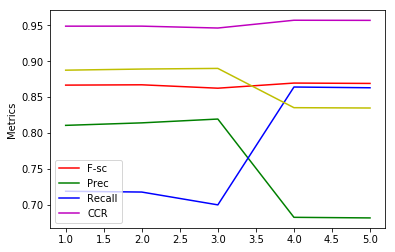

In [44]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 6, 1), fsc, 'r', np.arange(1, 6, 1), prec, 'g', np.arange(1, 6, 1), recall, 'b', np.arange(1, 6, 1),ccr, 'm',np.arange(1, 6, 1),roc_auc, 'y')
plt.ylabel('Metrics')
plt.legend(('F-sc', 'Prec', 'Recall', 'CCR'), loc='lower left')
plt.show()



## Using liblinear solver

In [45]:
pipeline = Pipeline([
    ('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,use_idf=False)),
    ('clf', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

parameters = {'clf__penalty':('l1','l2', None), 'clf__class_weight':(None, 'balanced')}
grid = GridSearchCV(pipeline, parameters, scoring = make_scorer(f1_score), cv=5, error_score=0.0, verbose=10)

grid.fit(train_feature_vectors_sparse, train_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6140189776553413, total=  12.3s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6013031337263418, total=  11.2s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.6s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6044799018103713, total=  11.4s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.0s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.5965238981998758, total=  11.4s
[CV] clf__class_weight=None, clf__penalty=l1 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   46.5s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l1, score=0.6326093606607526, total=  11.5s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.0s remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7107583774250441, total=   4.5s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7163059163059163, total=   4.9s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7339290861919862, total=   5.2s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7340759782919167, total=   7.8s
[CV] clf__class_weight=None, clf__penalty=l2 .........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  clf__class_weight=None, clf__penalty=l2, score=0.7014388489208634, total=   5.5s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=None, clf__penalty=None .......................
[CV]  clf__class_weight=None, clf__penalty=None, score=0.0, total=   0.1s
[CV] clf__class_weight=balanced, clf__penalty=l1 .....................
[CV]  clf__class_weight=balanced, clf__penalty=l1, score=0.6907430469074305, total=11.9min
[CV] clf__class_weight=bal

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 66.1min finished


GridSearchCV(cv=5, error_score=0.0,
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False,
         use_idf=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__penalty': ('l1', 'l2', None), 'clf__class_weight': (None, 'balanced')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=10)

In [12]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        st...ty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False))])

In [52]:
clf = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

clf.fit(train_feature_vectors_sparse, train_labels)

predictions = clf.predict(test_feature_vectors_sparse)
confmat = confusion_matrix(test_labels, predictions)

precision = confmat[1,1]/(confmat[1,1] + confmat[1,0])
recall = confmat[1,1]/(confmat[1,1] + confmat[0,1])
fScore = f1_score(test_labels, predictions, average='macro')
ccr = (confmat[0,0] + confmat[1,1])/(sum(sum(confmat)))
roc_auc = roc_auc_score(test_labels, predictions)
print("Precision = ",precision)
print("Recall = ",recall)
print("F_score = ",fScore)
print("CCR = ",ccr)
print("ROC_AUC = ", roc_auc)
print()
print("Confusion Matrix: \n", confmat)
print()

Precision =  0.819522704674
Recall =  0.700127424607
F_score =  0.862446157434
CCR =  0.946164176599
ROC_AUC =  0.889980270448

Confusion Matrix: 
 [[51418  2118]
 [ 1089  4945]]

